In [10]:
import yfinance as yf
import pandas as pd

ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2025-08-01", interval="1d", progress=False)
prices = data["Close"].dropna()  # use Close because it's already adjusted
print(prices.values.shape)
print(prices)

(3918, 1)
Ticker            ^GSPC
Date                   
2010-01-04  1132.989990
2010-01-05  1136.520020
2010-01-06  1137.140015
2010-01-07  1141.689941
2010-01-08  1144.979980
...                 ...
2025-07-25  6388.640137
2025-07-28  6389.770020
2025-07-29  6370.859863
2025-07-30  6362.899902
2025-07-31  6339.390137

[3918 rows x 1 columns]


/tmp/ipykernel_4891/3177803833.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2010-01-01", end="2025-08-01", interval="1d", progress=False)


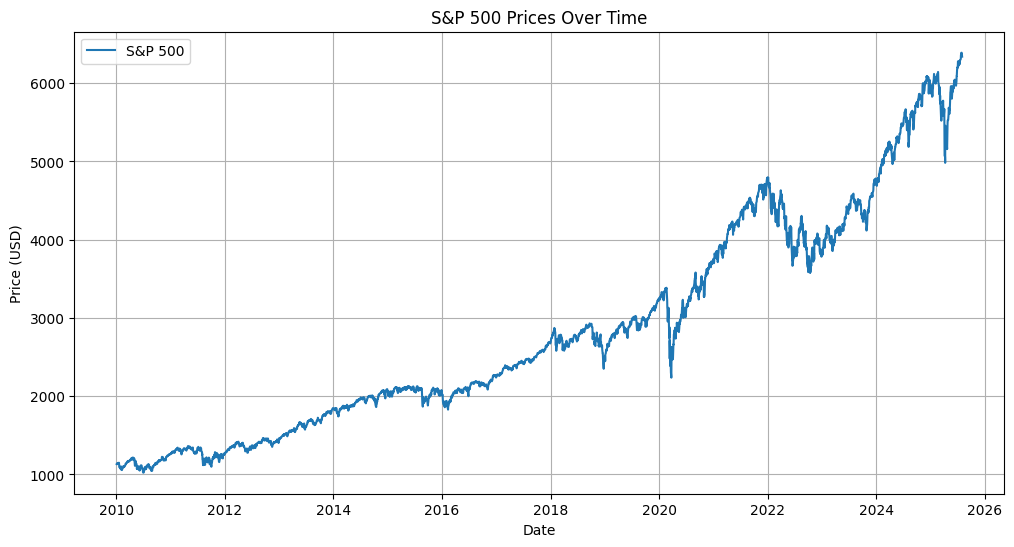

In [3]:
import matplotlib.pyplot as plt

# prices is your Series with Date as index
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices.values, label="S&P 500")
plt.title("S&P 500 Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
import numpy as np

logrets = np.log(prices / prices.shift(1)).dropna()
dt = 1/252  # daily -> annual convention
mu_hat = logrets.mean() / dt
sigma_hat = logrets.std(ddof=1) / np.sqrt(dt)

print("Estimated annual drift (mu):", mu_hat)
print("Estimated annual volatility (sigma):", sigma_hat)

Estimated annual drift (mu): Ticker
^GSPC    0.11078
dtype: float64
Estimated annual volatility (sigma): Ticker
^GSPC    0.17502
dtype: float64


In [9]:
np.savez(f"training_data/SNP500.npz", trajectories=prices.values.reshape(1, 1, -1))